Домашняя работа - Визуализация данных

In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

Для целей домашнего задания взята статистика последних 9 сезонов NHL

In [2]:
skater_stats = pd.read_csv('nhl-game-data/game_skater_stats.csv') # Статистика полевых игроков
game_stats = pd.read_csv('nhl-game-data/game.csv')                # Статистика игр
players=pd.read_csv('nhl-game-data/player_info.csv')              # Данные игроков

In [3]:
"""Лепим из трех датасетов нужную нам таблицу"""
joined=skater_stats.merge(game_stats, on='game_id', how='left')
joined=joined[['game_id', 'player_id', 'timeOnIce', 'assists', 'goals',
       'season',
         ]]
full_df=joined.merge(players, on='player_id',how='left')
full_df=full_df[['season', 'player_id', 'timeOnIce', 'assists', 'goals',
        'firstName', 'lastName', 'nationality',
       ]]
full_df.head()

,season,player_id,timeOnIce,assists,goals,firstName,lastName,nationality
0,20112012,8467412,999,0,0,Alexei,Ponikarovsky,UKR
1,20112012,8468501,1168,0,0,Anton,Volchenkov,RUS
2,20112012,8470609,558,0,0,Steve,Bernier,CAN
3,20112012,8471816,1134,0,0,Mark,Fayne,USA
4,20112012,8472410,436,0,0,Stephen,Gionta,USA


На первом графике хочу посмотреть, каково распределение звездных хоккеистов в NHL по их гражданству.
Звездными будем считать хоккеистов, набравших 50 и более очков (гол+пас) за один регулярный сезон

In [43]:
"""Поскольку в NHL играют представители очень многих стран, мы будем смотреть в выборке только шестерку сильнейших, 
остальных объединим в седьмую группу OTH (others)"""

def nat(row):
    if row['nationality'] not in ['CAN','USA','SWE',"CZE",'RUS','FIN']:
        return 'OTH'
    else:
        return row['nationality']

In [44]:
full_df['nationality'] = full_df.apply(nat,axis=1)

In [45]:
grouped_df = full_df.groupby(['season','nationality','player_id']).sum()

In [46]:
"""Эта функция как раз определит, является ли хоккеист звездой"""
def leaders(row):
    if row['assists']+row['goals']>=50:
        return 1
    else:
        return 0

In [47]:
grouped_df['leader']=grouped_df.apply(leaders,axis=1)
leaders1=grouped_df[grouped_df['leader'] == 1]
leaders2=leaders1.groupby(['season','nationality']).sum()
leaders2=leaders2[['leader']]
leaders2=leaders2.unstack('nationality')
leaders1.head()

timeOnIce  assists  goals  leader
season   nationality player_id                                   
20102011 CAN         8450725       102499       43     19       1
                     8458537        80955       42     18       1
                     8459444        86601       33     18       1
                     8460496        95352       27     25       1
                     8462038        88547       42     23       1

И вот, наконец, график. Для отображения целевой информации выбрал стобчатую диаграмму с распределением. Она позволит не только оценить распределение, но и сравнить кол-во звезд за последние несколько сезонов

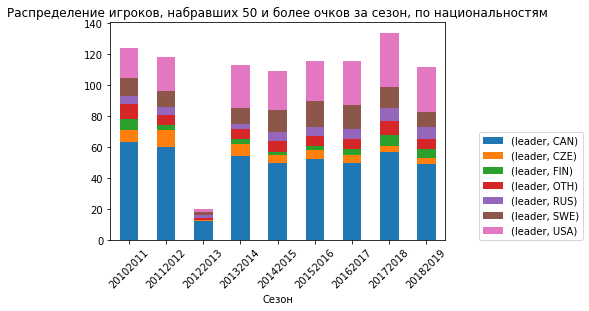

In [48]:
ax=leaders2.plot(kind='bar', rot=45, stacked=True)
ax.set_title('Распределение игроков, набравших 50 и более очков за сезон, по национальностям')
ax.set_xlabel('Сезон')
ax.legend(loc=(1.1, 0))

1. На графике можно увидеть, что общее кол-во звезд каждый сезон остается примерно одинаковым
2. Провал в сезоне 2012-2013 объясняется локаутом (профсоюз, представляющий игроков, не смог вовремя договориться с руководством лиги, из-за чего сезон начался с большим опозданием, прошел с гораздо меньшим количеством игр, следовательно очень мало игроков смогли преодолеть рубеж в 60 очков)
3. На графике видно, что канадцы и американцы впереди планеты всей. Поэтому для остроты эксперимента посмотрим еще выборку,
содержащую только европейских игроков

In [49]:
leaders3=full_df
leaders3=leaders3[(leaders3['nationality']!='CAN') & (leaders3['nationality']!='USA')]
leaders3=leaders3.groupby(['season','nationality','player_id']).sum()
leaders3['leader']=leaders3.apply(leaders,axis=1)
leaders3=leaders3[leaders3['leader'] == 1]
leaders3=leaders3.groupby(['season','nationality']).sum()
leaders3=leaders3[['leader']]
leaders3=leaders3.unstack('nationality')
leaders3.head()

leader                      
nationality    CZE  FIN   OTH  RUS   SWE
season                                  
20102011       8.0  7.0  10.0  5.0  12.0
20112012      11.0  3.0   7.0  5.0  10.0
20122013       1.0  NaN   1.0  2.0   2.0
20132014       8.0  3.0   7.0  3.0  10.0
20142015       5.0  2.0   7.0  6.0  14.0

Эту выборку посмотрим на другом типе графика - area

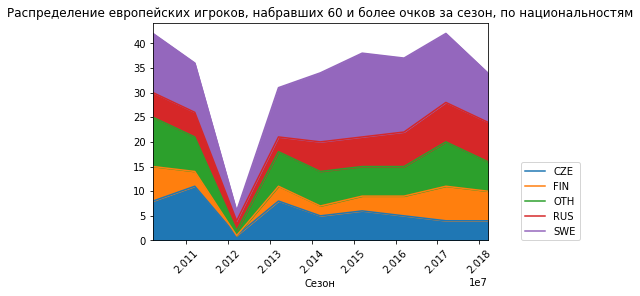

In [50]:
ax2=leaders3.plot(kind='area', rot=45, stacked=True)
ax2.set_title('Распределение европейских игроков, набравших 60 и более очков за сезон, по национальностям')
ax2.set_xlabel('Сезон')
#ax2.legend(loc=(1.1, 0))
ax2.legend(['CZE','FIN','OTH','RUS','SWE'],loc=(1.1, 0))

1. На графике видно, что с локаутного сезона европейцы заметно прибавляли год от года и достигли предлокаутных значений. Небольшой спад произошел только в последнем сезоне
2. Очевидные лидеры среди европейцев - шведы, хоть в последнем сезоне к ним вплотную подобрались русские и фины


На следующем графике (гистограмме) посмотрим распределение звездных хоккеистов по возрасту в последнем сезоне

In [52]:
"""Эта функция позволит определить текущий возраст хоккеиста"""
def age(row):
    from datetime import datetime, timedelta
    birthdate=datetime.strptime(row['birthDate'],'%Y-%m-%d')
    age=int((datetime.today()-birthdate).days/365)
    return age   

In [65]:
age_leaders=full_df.merge(players, on='player_id',how='left')
age_leaders=age_leaders[age_leaders['season']==20182019]
age_leaders=age_leaders.groupby(['player_id']).sum()
age_leaders['leader']=age_leaders.apply(leaders,axis=1)
age_leaders=age_leaders[(age_leaders['leader']==1)]
age_leaders=age_leaders.merge(players, on='player_id',how='left')
age_leaders['age']=age_leaders.apply(age,axis=1)
age_leaders.head()

,player_id,season,timeOnIce,assists,goals,leader,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link,age
0,8466138,1473287387,68102,35,16,1,Joe,Thornton,CAN,London,C,1979-07-02,/api/v1/people/8466138,39
1,8468508,1654925558,85818,30,23,1,Justin,Williams,CAN,Cobourg,RW,1981-10-04,/api/v1/people/8468508,37
2,8470595,1634743539,88089,30,22,1,Eric,Staal,CAN,Thunder Bay,C,1984-10-29,/api/v1/people/8470595,34
3,8470606,1453105368,88154,29,22,1,Dustin,Brown,USA,Ithaca,RW,1984-11-04,/api/v1/people/8470606,34
4,8470610,1493469406,82887,33,28,1,Zach,Parise,USA,Minneapolis,LW,1984-07-28,/api/v1/people/8470610,34


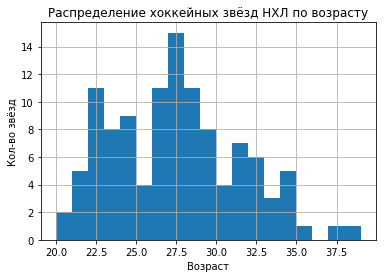

In [64]:
ax3=age_leaders.age.hist(bins=19)
ax3.set_title('Распределение хоккейных звёзд НХЛ по возрасту')
ax3.set_xlabel('Возраст')
ax3.set_ylabel('Кол-во звёзд')
ax3

Несмотря на сравнительно небольшое количество исследуемых хоккеистов, на графике прослеживается форма нормального гауссового распределения. Судя по данным последнего сезона пик результативности хоккеистов приходится на 27 лет

In [72]:
def points(row):
    return row['goals']+row['assists']

In [75]:
skaters=full_df.merge(players, on='player_id',how='left')
skaters=skaters[skaters['season']==20182019]
skaters=skaters.groupby(['player_id']).sum()
skaters['goals+assists']=skaters.apply(points,axis=1)
skaters.head()

,season,timeOnIce,assists,goals,goals+assists
player_id,,,,,
8464989,1432923349,49031,13,7,20
8465009,1251285178,78409,9,5,14
8466138,1473287387,68102,35,16,51
8466139,1654925558,80415,21,16,37
8468001,20182019,163,0,0,0


Переходим к библиотеке Seaborn.
С помощью графика Pairplot посмотрим как коррелируют показатели "Игровое время" и "Набранные очки"

In [76]:
import seaborn as sns

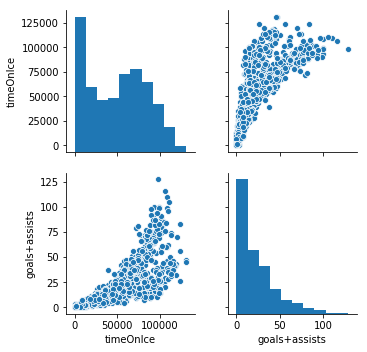

In [78]:
sns_plot = sns.pairplot(
    skaters[['timeOnIce', 'goals+assists']])
sns_plot

На верхнем левом графике видим распределение полевых хоккеистов по игровому времени. Высокий показатель в левой части графика объясняется большим количеством хоккеистов, находящихся в запасе. Их игровое время близко к нулю, но они тем не менее числятся в списке активных хоккеистов лиги.
На нижнем правом графике представлено распределение хоккеистов по набранным очкам. Вроде бы это называется геометрическим распределением (наивысший показатель в левой части графика и резкое убывание с увеличением значения х)
На остальных графиках показано распределение игрового времени и набранных очков. Прослеживается корреляция этих показателей, что логично - чем больше игрового времени, тем больше шансов отличиться

На следующем графике посмотрим на зависимость этих показателей поближе. Для этого немного подчистим данные - уберем хоккеистов, сидящих на лавке (с игровым временем менее 30 минут за сезон)

In [86]:
skaters=skaters[skaters['timeOnIce']>=1800]

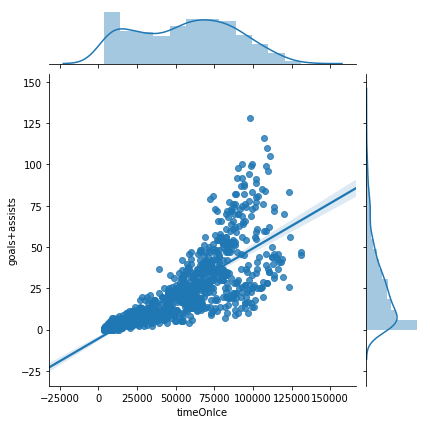

In [87]:
ax4=sns.jointplot(x='timeOnIce', y='goals+assists', 
              data=skaters, kind='reg')

На этом графике более крупно наблюдаем разброс показателей хоккеистов по игровому времени и набранным очкам. Прямая корреляции показывает прямую зависимость этих параметров.
Видно, что все суперзвезды (со 100 и более очками) имею игровое время минимум 100 тысяч секунд, что соответствует более, чем 20 минутам за игру.
Кстати, самая верхняя точка на графике - 128 очков нападающего Тампы Никиты Кучерова - обновленный рекорд всех советских и российских хоккеистов за всю историю НХЛ!